# Brazilian bond and the Curve Bootstrap class
## Author: Gustavo Soares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from finmath.brazilian_bonds.government_bonds import LTN, NTNF
from finmath.termstructure.curve_models import CurveBootstrap as CB

### LTNs (zero coupon bonds)

In [2]:
ref_date = pd.to_datetime('2021-02-05').date()

ltn_expires = [
    '2021-04-01',
    '2021-07-01',
    '2021-10-01',
    '2022-01-01',
    '2022-04-01',
    '2022-07-01',
    '2022-10-01',
    '2023-01-01',
    '2023-07-01',
    '2024-01-01',
    '2024-07-01',
]

ltn_yields = [
    0.020580,
    0.023885,
    0.029904,
    0.034463,
    0.040148,
    0.044847,
    0.049137,
    0.052500,
    0.057519,
    0.061150,
    0.064247,
]

ltn_prices = []
ltn_cash_flows = []
for T, y in zip(ltn_expires, ltn_yields):
        ltn = LTN(expiry=T, rate=y, ref_date=ref_date)
        ltn_prices += [ltn.price]
        ltn_cash_flows += [pd.Series(index=[pd.to_datetime(T)], data=[ltn.principal])]

### NTNFs (coupon paying bonds)

In [3]:
ntnf_expires = [
    '2023-01-01',
    '2025-01-01',
    '2027-01-01',
    '2029-01-01',
    '2031-01-01',
]

ntnf_yields = [
    0.05113,
    0.06215,
    0.06869,
    0.07317,
    0.07639,
]

ntnf_prices = []
ntnf_cash_flows = []
for T, y in zip(ntnf_expires, ntnf_yields):
        ntnf = NTNF(expiry=T, rate=y, ref_date=ref_date)
        ntnf_prices += [ntnf.price]
        ntnf_cash_flows += [ntnf.cash_flows]

### Curve Bootstrap

In [4]:
all_bond_prices = ltn_prices + ntnf_prices
all_bond_cash_flows = ltn_cash_flows + ntnf_cash_flows
cb = CB(prices=all_bond_prices, cash_flows=all_bond_cash_flows, ref_date=ref_date)

#### Plot curves

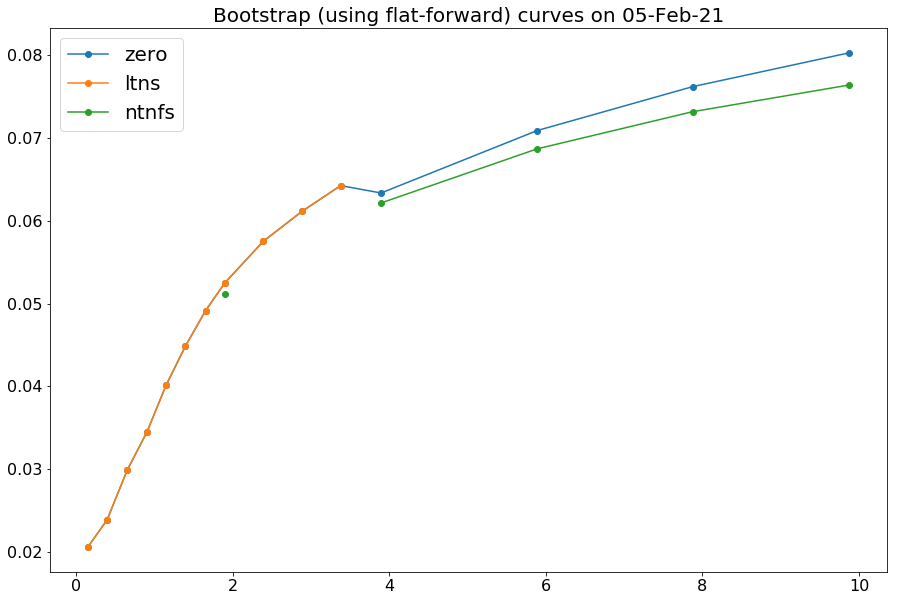

In [5]:
ntnf_curve = pd.DataFrame(index=[cb.dc.tf(cb.ref_date, x) for x in pd.to_datetime(ntnf_expires)],
                           columns=['ntnfs'],
                           data=ntnf_yields).sort_index()
ltn_curve = pd.DataFrame(index=[cb.dc.tf(cb.ref_date, x) for x in pd.to_datetime(ltn_expires)],
                           columns=['ltns'],
                           data=ltn_yields).sort_index()
zero_curve = (cb.zero_curve).to_frame('zero')
curves = pd.concat([zero_curve, ltn_curve, ntnf_curve], join='outer', axis=1, sort=True)
curves.plot(figsize=(15,10), fontsize=16, marker='o')
plt.title('Bootstrap (using flat-forward) curves on %s' % cb.ref_date.strftime('%d-%b-%y'),fontsize=20)
plt.legend(fontsize=20)
plt.show()